# Task 1

## My works

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [12]:
# Load the CSV file
gas = pd.read_csv('Nat_Gas.csv')

# Convert the 'Dates' column to datetime format, specifying the format
gas['Dates'] = pd.to_datetime(gas['Dates'], format='%m/%d/%y')

# Set 'Dates' as the index
gas = gas.set_index('Dates')

# Display the first few rows of the dataset
gas.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


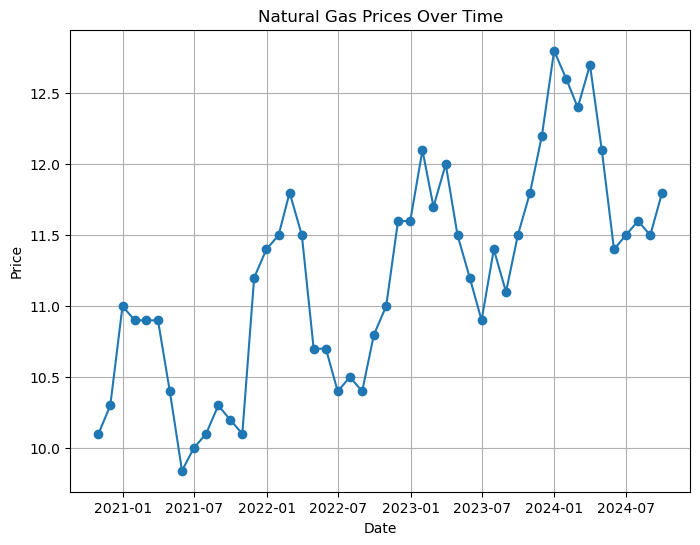

In [14]:
# Plot the gas prices over time
plt.figure(figsize=(8, 6))
plt.plot(gas.index, gas['Prices'], marker='o')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                 Prices   No. Observations:                   48
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -15.077
Date:                Tue, 03 Sep 2024   AIC                             42.155
Time:                        10:06:45   BIC                             53.255
Sample:                    10-31-2020   HQIC                            46.332
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0155      0.162      0.095      0.924      -0.302       0.333
ar.L2          0.1198      0.186      0.644      0.519      -0.245       0.484
ar.L3          0.0767      0.195      0.394      0.6

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/var/folders/p9/2v6v402113x4nbshh_q68zb40000gn/T/ipykernel_9920/1035868797.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(gas.index[-1], periods=12, freq='M'), forecast, label='Forecast', color='red')


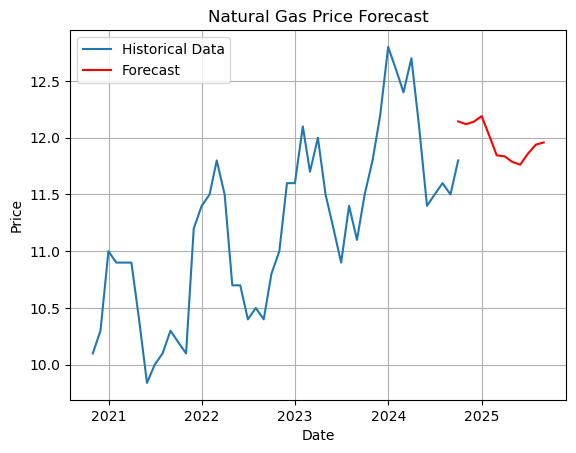

In [16]:
# Fit an ARIMA model
model = ARIMA(gas['Prices'], order=(5, 1, 0))  # Adjust order based on AIC/BIC
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting the next year (12 months)
forecast = model_fit.forecast(steps=12)

# Plot the forecast
plt.plot(gas.index, gas['Prices'], label='Historical Data')
plt.plot(pd.date_range(gas.index[-1], periods=12, freq='M'), forecast, label='Forecast', color='red')
plt.title('Natural Gas Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [107]:
def predict_price(date):
    date = pd.to_datetime(date)
    
    if date in gas.index:
        return gas.loc[date, 'Prices']
    else:
        # If the date is in the future, use the forecasted data
        if date > gas.index[-1]:
            return forecast.loc[date.strftime('%Y-%m-%d')]
        else:
            # Interpolate for dates within the historical range
            return gas.reindex(gas.index.union([date])).interpolate(method='time').loc[date, 'Prices']

# Example prediction
date_to_predict = input("Please input a date (YYYY-MM-DD): ")
predicted_price = predict_price(date_to_predict)
print(f"Predicted gas price on {date_to_predict}: {predicted_price}")

Please input a date (YYYY-MM-DD):  2024-10-31


Predicted gas price on 2024-10-31: 12.144236455330189


## JPMorgan Chase example

/var/folders/p9/2v6v402113x4nbshh_q68zb40000gn/T/ipykernel_15014/1224915940.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_time = pd.to_datetime(date_time)
/var/folders/p9/2v6v402113x4nbshh_q68zb40000gn/T/ipykernel_15014/1224915940.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'])


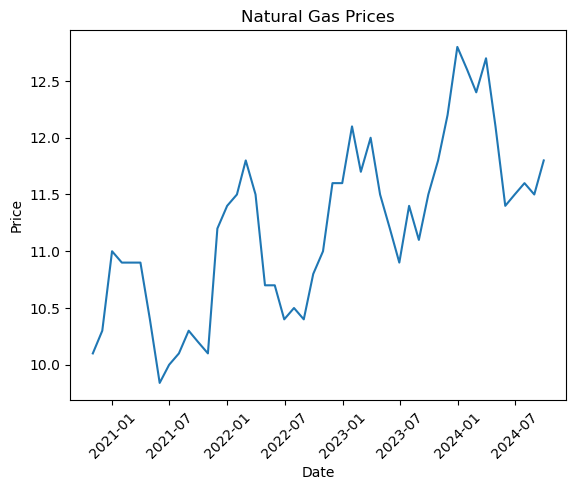

In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date, timedelta

date_time = ["10-2020", "11-2020", "12-2020"]
date_time = pd.to_datetime(date_time)
data = [1, 2, 3]

df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'])
prices = df['Prices'].values
dates = df['Dates'].values

# plot prices against dates
fig, ax = plt.subplots()
ax.plot_date(dates, prices, '-')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Natural Gas Prices')
ax.tick_params(axis='x', rotation=45)

plt.show()

# From the plot - we can see the prices have a natural frequency of around a year, but trend upwards. 
# We can do a linear regression to get the trend, and then fit a sin function to the variation in each year.

In [56]:
# First we need the dates in terms of days from the start, to make it easier to interpolate later.
start_date = date(2020,10,31)
end_date = date(2024,9,30)
months = []
year = start_date.year
month = start_date.month + 1
while True:
    current = date(year, month, 1) + timedelta(days=-1)
    months.append(current)
    if current.month == end_date.month and current.year == end_date.year:
        break
    else:
        month = ((month + 1) % 12) or 12
        if month == 1:
            year += 1
        
days_from_start = [(day - start_date ).days for day in months]

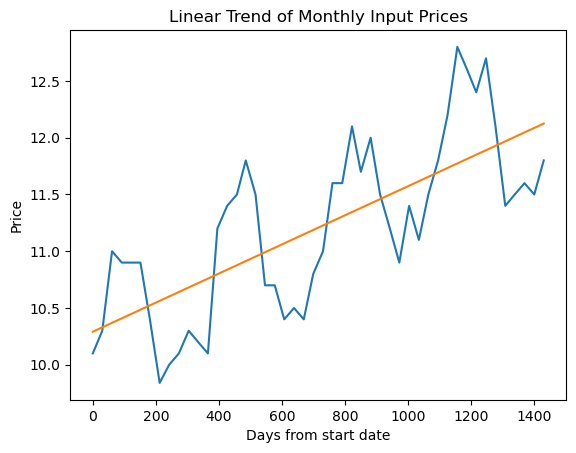

0.001282373598760221 10.29104112595228


In [64]:
# Simple regression for the trend will fit to a model y = Ax + B. The estimator for the slope is given by \hat{A} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}, 
# and that for the intercept by \hat{B} = \bar{y} - hat{A} * \xbar

def simple_regression(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    slope = np.sum((x - xbar) * (y - ybar))/ np.sum((x - xbar)**2)
    intercept = ybar - slope*xbar
    return slope, intercept

time = np.array(days_from_start)
slope, intercept = simple_regression(time, prices)

# Plot linear trend
plt.plot(time, prices)
plt.plot(time, time * slope + intercept)
plt.xlabel('Days from start date')
plt.ylabel('Price')
plt.title('Linear Trend of Monthly Input Prices')
plt.show()
print(slope, intercept)

Text(0.5, 1.0, 'Smoothed Estimate of Monthly Input Prices')

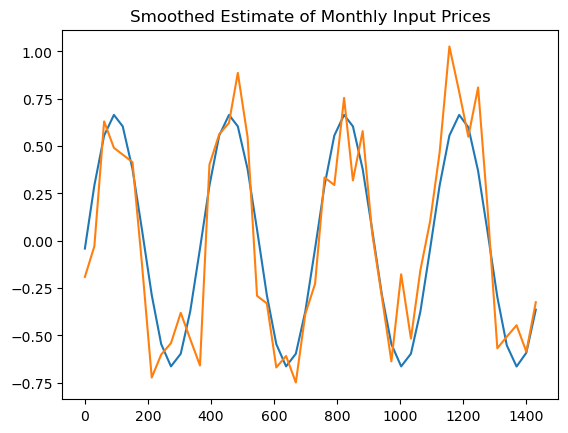

In [66]:
# From this plot we see the linear trend has been captured. Now to fit the intra-year variation. 
# Given that natural gas is used more in winter, and less in summer, we can guess the frequency of the price movements to be about a year, or 12 months.
# Therefore we have a model y = Asin( kt + z ) with a known frequency. Rewriting y = Acos(z)sin(kt) + Asin(z)cos(kt), 
# we can use bilinear regression, with no intercept, to solve for u = Acos(z), w = Asin(z)

sin_prices = prices - (time * slope + intercept)
sin_time = np.sin(time * 2 * np.pi / (365))
cos_time = np.cos(time * 2 * np.pi / (365))

def bilinear_regression(y, x1, x2):
    # Bilinear regression without an intercept amounts to projection onto the x-vectors
    slope1 = np.sum(y * x1) / np.sum(x1 ** 2)
    slope2 = np.sum(y * x2) / np.sum(x2 ** 2)
    return(slope1, slope2)

slope1, slope2 = bilinear_regression(sin_prices, sin_time, cos_time)

# We now recover the original amplitude and phase shift as A = slope1 ** 2 + slope2 ** 2, z = tan^{-1}(slope2/slope1)
amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
shift = np.arctan2(slope2, slope1)

# Plot smoothed estimate of full dataset
plt.plot(time, amplitude * np.sin(time * 2 * np.pi / 365 + shift))
plt.plot(time, sin_prices)
plt.title('Smoothed Estimate of Monthly Input Prices')

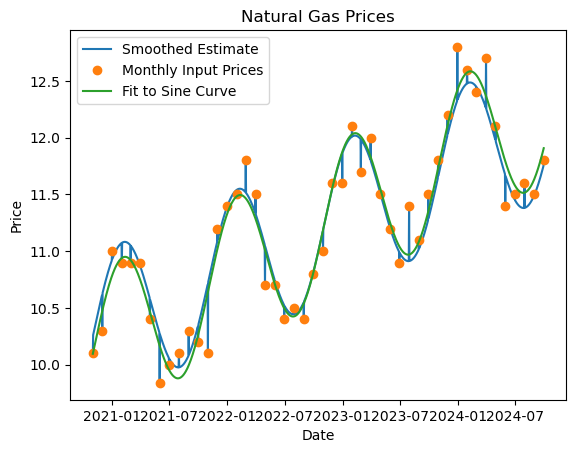

In [9]:
# Define the interpolation/extrapolation function
def interpolate(date):
    days = (date - pd.Timestamp(start_date)).days
    if days in days_from_start:
        # Exact match found in the data
        return prices[days_from_start.index(days)]
    else:
        # Interpolate/extrapolate using the sin/cos model
        return amplitude * np.sin(days * 2 * np.pi / 365 + shift) + days * slope + intercept

# Create a range of continuous dates from start date to end date
continuous_dates = pd.date_range(start=pd.Timestamp(start_date), end=pd.Timestamp(end_date), freq='D')

# Plot the smoothed estimate of the full dataset using interpolation
plt.plot(continuous_dates, [interpolate(date) for date in continuous_dates], label='Smoothed Estimate')

# Fit the monthly input prices to the sine curve
x = np.array(days_from_start)
y = np.array(prices)
fit_amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
fit_shift = np.arctan2(slope2, slope1)
fit_slope, fit_intercept = simple_regression(x, y - fit_amplitude * np.sin(x * 2 * np.pi / 365 + fit_shift))
plt.plot(dates, y, 'o', label='Monthly Input Prices')
plt.plot(continuous_dates, fit_amplitude * np.sin((continuous_dates - pd.Timestamp(start_date)).days * 2 * np.pi / 365 + fit_shift) + (continuous_dates - pd.Timestamp(start_date)).days * fit_slope + fit_intercept, label='Fit to Sine Curve')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Prices')
plt.legend()
plt.show()

# Task 2

## My works

In [ ]:
def calculate_contract_value(injection_dates, withdrawal_dates, injection_rate, withdrawal_rate, 
                             max_volume, storage_cost_per_month, injection_withdrawal_cost_per_mmbtu, 
                             transport_cost):
    # Initialize variables
    total_purchase_cost = 0
    total_sales_revenue = 0
    total_storage_cost = 0
    total_injection_withdrawal_cost = 0
    total_transport_cost = 0
    stored_volume = 0

    # Convert dates to datetime format if not already
    injection_dates = pd.to_datetime(injection_dates)
    withdrawal_dates = pd.to_datetime(withdrawal_dates)
    
    # Calculate purchase costs and storage costs
    for injection_date in injection_dates:
        price_at_injection = interpolate(injection_date)
        purchase_volume = min(injection_rate, max_volume - stored_volume)
        purchase_cost = purchase_volume * price_at_injection
        total_purchase_cost += purchase_cost
        stored_volume += purchase_volume

    # Calculate sales revenue
    for withdrawal_date in withdrawal_dates:
        price_at_withdrawal = interpolate(withdrawal_date)
        sell_volume = min(withdrawal_rate, stored_volume)
        sales_revenue = sell_volume * price_at_withdrawal
        total_sales_revenue += sales_revenue
        stored_volume -= sell_volume
    
    # Calculate storage costs (assuming storage costs are charged at the end of each month)
    storage_duration = (withdrawal_dates[-1] - injection_dates[0]).days / 30.0  # Convert to months
    total_storage_cost = storage_cost_per_month * np.ceil(storage_duration)

    # Calculate injection and withdrawal costs
    total_injection_withdrawal_cost = (len(injection_dates) + len(withdrawal_dates)) * injection_withdrawal_cost_per_mmbtu

    # Calculate transportation costs
    total_transport_cost = (len(injection_dates) + len(withdrawal_dates)) * transport_cost

    # Calculate net contract value
    contract_value = total_sales_revenue - (total_purchase_cost + total_storage_cost + 
                                            total_injection_withdrawal_cost + total_transport_cost)

    return contract_value

In [74]:
# Example inputs
injection_dates = ['2023-06-30', '2023-07-31', '2023-08-31']
withdrawal_dates = ['2023-12-31', '2024-01-31', '2024-02-29']
injection_rate = 1000000  # 1 million MMBtu
withdrawal_rate = 1000000  # 1 million MMBtu
max_volume = 3000000  # 3 million MMBtu
storage_cost_per_month = 100000  # $100K per month
injection_withdrawal_cost_per_mmbtu = 10000  # $10K per 1 million MMBtu
transport_cost = 50000  # $50K per transport

# Calculate the value of the contract
contract_value = calculate_contract_value(injection_dates, withdrawal_dates, injection_rate, 
                                          withdrawal_rate, max_volume, storage_cost_per_month, 
                                          injection_withdrawal_cost_per_mmbtu, transport_cost)

print(f"Contract Value: ${contract_value:.2f}")

Contract Value: $3140000.00


In [82]:
# Get user inputs
injection_dates = input("Enter injection dates (comma-separated, e.g., '2023-06-30,2023-07-31'): ")
withdrawal_dates = input("Enter withdrawal dates (comma-separated, e.g., '2023-12-31,2024-01-31'): ")
injection_rate = float(input("Enter injection rate (in Btu, e.g., 1000000): "))
withdrawal_rate = float(input("Enter withdrawal rate (in Btu, e.g., 1000000): "))
max_volume = float(input("Enter maximum storage volume (in Btu, e.g., 3000000): "))
storage_cost_per_month = float(input("Enter storage cost per month (e.g., 100000): "))
injection_withdrawal_cost_per_mmbtu = float(input("Enter injection/withdrawal cost per MMBtu (e.g., 10000): "))
transport_cost = float(input("Enter transport cost per transaction (e.g., 50000): "))

# Convert comma-separated date strings to lists
injection_dates = [date.strip() for date in injection_dates.split(",")]
withdrawal_dates = [date.strip() for date in withdrawal_dates.split(",")]

print(injection_dates)
# Calculate contract value
contract_value = calculate_contract_value(
    injection_dates, withdrawal_dates, injection_rate, withdrawal_rate,
    max_volume, storage_cost_per_month, injection_withdrawal_cost_per_mmbtu, transport_cost
)

print(f"Calculated Contract Value: ${contract_value:.2f}")

Enter injection dates (comma-separated, e.g., '2023-06-30,2023-07-31'):  '2023-06-30', '2023-07-31', '2023-08-31'
Enter withdrawal dates (comma-separated, e.g., '2023-12-31,2024-01-31'):  '2023-12-31', '2024-01-31', '2024-02-29'
Enter injection rate (in Btu, e.g., 1000000):  1000000
Enter withdrawal rate (in Btu, e.g., 1000000):  1000000
Enter maximum storage volume (in Btu, e.g., 3000000):  3000000
Enter storage cost per month (e.g., 100000):  100000
Enter injection/withdrawal cost per MMBtu (e.g., 10000):  10000
Enter transport cost per transaction (e.g., 50000):  50000


["'2023-06-30'", "'2023-07-31'", "'2023-08-31'"]
Calculated Contract Value: $3140000.00


## JPMorgan Chase example

In [85]:
#Task 2

from datetime import date
import math

def price_contract(in_dates, in_prices, out_dates, out_prices, rate, storage_cost_rate, total_vol, injection_withdrawal_cost_rate):
    volume = 0
    buy_cost = 0
    cash_in = 0
    last_date = min(min(in_dates), min(out_dates))
    
    # Ensure dates are in sequence
    all_dates = sorted(set(in_dates + out_dates))
    
    for i in range(len(all_dates)):
        # processing code for each date
        start_date = all_dates[i]

        if start_date in in_dates:
            # Inject on these dates and sum up cash flows
            if volume <= total_vol - rate:
                volume += rate

                # Cost to purchase gas
                buy_cost += rate * in_prices[in_dates.index(start_date)]
                # Injection cost
                injection_cost = rate * injection_withdrawal_cost_rate
                buy_cost += injection_cost
                print('Injected gas on %s at a price of %s'%(start_date, in_prices[in_dates.index(start_date)]))

            else:
                # We do not want to inject when rate is greater than total volume minus volume
                print('Injection is not possible on date %s as there is insufficient space in the storage facility'%start_date)
        elif start_date in out_dates:
            #Withdraw on these dates and sum cash flows
            if volume >= rate:
                volume -= rate
                cash_in += rate * out_prices[out_dates.index(start_date)]
                # Withdrawal cost
                withdrawal_cost = rate * injection_withdrawal_cost_rate
                cash_in -= withdrawal_cost
                print('Extracted gas on %s at a price of %s'%(start_date, out_prices[out_dates.index(start_date)]))
            else:
                # we cannot withdraw more gas than is actually stored
                print('Extraction is not possible on date %s as there is insufficient volume of gas stored'%start_date)
                
    store_cost = math.ceil((max(out_dates) - min(in_dates)).days // 30) * storage_cost_rate
    return cash_in - store_cost - buy_cost

# Example usage of price_contract()
in_dates = [date(2022, 1, 1), date(2022, 2, 1), date(2022, 2, 21), date(2022, 4, 1)] #injection dates
in_prices = [20, 21, 20.5, 22]#prices on the injection days
out_dates = [date(2022, 1, 27), date(2022, 2, 15), date(2022, 3, 20), date(2022, 6, 1)] # extraction dates
out_prices = [23, 19, 21, 25] # prices on the extraction days
rate = 100000  # rate of gas in cubic feet per day
storage_cost_rate = 10000  # total volume in cubic feet
injection_withdrawal_cost_rate = 0.0005  # $/cf
max_storage_volume = 500000 # maximum storage capacity of the storage facility
result = price_contract(in_dates, in_prices, out_dates, out_prices, rate, storage_cost_rate, max_storage_volume, injection_withdrawal_cost_rate)
print()
print(f"The value of the contract is: ${result}")




## Explaining the Methodology Adopted for this Task ##

# The given Python code implements a function `price_contract` that calculates the profit or loss obtained by 
# undertaking trades on given dates for a contract involving the buying, storing, and selling of natural gas the
# storage cost of the gas, the injection/withdrawal. The value of the contract is the profit or loss obtained by
# undertaking the trades on given dates. Play around with the parameters and you'll be able to see this. 
# In the end the intent for this function returns the value of the contract.
#The function takes in eight inputs:
#- `in_dates`: A list of dates on which the gas is being injected into the storage facility.
#- `in_prices`: A list of prices of gas on each of the injection dates.
#- `out_dates`: A list of dates on which the gas is being withdrawn from the storage facility.
#- `out_prices`: A list of prices of gas on each of the withdrawal dates.
#- `rate`: The rate of gas in cubic feet per day.
#- `storage_cost_rate`: A fixed monthly fee to store the gas
#- `total_vol`: The total volume of gas in cubic feet that can be stored.
#- `injection_withdrawal_cost_rate`: The injection/withdrawal cost of gas in dollars per cubic foot.

# The function first ensures that all the dates are in sequence and sorted in ascending order. Then, it iterates
#over all the dates and calculates the cash flows on each date. If the current date is an injection date, it
#injects gas into the storage facility and calculates the cost to store the gas, the cost to purchase the gas,
#and the injection cost. If the current date is a withdrawal date, it withdraws gas from the storage facility and
#calculates the cash inflow from selling the gas, the cost to store the remaining gas, and the withdrawal cost.

# Finally, the function returns the net profit or loss by subtracting the storage cost and the cost to purchase 
#the gas from the cash inflow from selling the gas.

# The example usage of the `price_contract` function calculates the profit or loss for a contract that involves
#injecting gas on four different dates and withdrawing gas on four different dates, each with a different price. 
#The other inputs such as the rate of gas, the storage cost rate, the total volume, and the injection/withdrawal 
#cost rate are also provided. The output is printed to the console using an f-string.


Injected gas on 2022-01-01 at a price of 20
Extracted gas on 2022-01-27 at a price of 23
Injected gas on 2022-02-01 at a price of 21
Extracted gas on 2022-02-15 at a price of 19
Injected gas on 2022-02-21 at a price of 20.5
Extracted gas on 2022-03-20 at a price of 21
Injected gas on 2022-04-01 at a price of 22
Extracted gas on 2022-06-01 at a price of 25

The value of the contract is: $399600.0
